*Scikit-learn*

In [1]:
from sklearn.datasets import load_iris

*return_X_y=True Parameter: When you set return_X_y=True, the function returns two separate objects:
X: A 2D array (or DataFrame) of shape (150, 4) containing the feature values (sepal length, sepal width, petal length, and petal width).
y: A 1D array (or Series) of shape (150,) containing the target labels, which indicate the species of each iris flower (encoded as 0, 1, or 2).*

In [ ]:
load_iris(return_X_y=True)

In [3]:
X, y = load_iris(return_X_y=True)

*First we create a model and feed the model*

In [4]:
# linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
Model = LinearRegression()
Model.fit(X, y)
Model.predict(X)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor()

In [ ]:
mod.fit(X, y)

In [ ]:
mod.predict(X)

*Visualization of data*

In [ ]:
import matplotlib.pyplot as plt
pred = mod.predict(X)
plt.scatter(pred, y)
plt.xlabel('Predicted value')
plt.ylabel('y value')
plt.show()

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
from sklearn.datasets import fetch_openml

***df = fetch_openml("titanic", version=1, as_frame=True)["data"]***

*As of January 18, 2025, OpenML.org is currently inaccessible due to a cyberattack on TU Eindhoven, the institution hosting the platform. The OpenML team has acknowledged the issue and is working to restore access as soon as the university's network is operational again.*

In [12]:
df = pd.read_csv('../files/train.csv')

In [ ]:
df.isnull().sum()

In [ ]:
miss_val_per = pd.DataFrame((df.isnull().sum() / len(df)) * 100)
miss_val_per

In [ ]:
plt.title("Percentage of Missing Values")

plt.bar(
    miss_val_per[0].index,
    miss_val_per[0].values,
    color="skyblue",
)

plt.xticks(rotation=45, ha="center")

plt.ylabel('Percentage')
plt.tight_layout()

plt.show()

*Value Imputation : the process of replacing missing or NaN (Not a Number) values in a dataset with substituted values.*

In [16]:
from sklearn.impute import SimpleImputer

In [ ]:
print(f"Number of null values before imputing: {df['Age'].isnull().sum()}")

In [ ]:
imput = SimpleImputer(strategy="mean")
df["Age"] = imput.fit_transform(df[["Age"]]).flatten()
print(f"Number of null values after imputing: {df['Age'].isnull().sum()}")

*Imputing over whole dataset*

In [ ]:
def getParameters(data):
    # Initialize an empty dictionary to store the column parameters
    parameters = {}

    # Iterate through columns in the DataFrame where there are missing values
    for col in data.columns[data.isnull().any()]:
        
        # Check the data type of the column and choose imputation strategy
        if data[col].dtype in ["float64", "int64", "int32"]:
            strategy = "mean"  # For numerical columns, use the mean for imputation
        else:
            strategy = "most_frequent"  # For categorical columns, use the most frequent value
        
        # Get the first missing value (if any) for the current column
        missing_values = data[col][data[col].isnull()].values[0]
        
        # Store column parameters in the dictionary: missing value and imputation strategy
        parameters[col] = {
            "missing_values": missing_values,  # First missing value encountered
            "strategy": strategy,  # Chosen imputation strategy
        }

    # Return the dictionary containing parameters for all columns with missing values
    return parameters

getParameters(df)

In [20]:
parameters = getParameters(df)

In [27]:
for col, para in parameters.items():
    strategy = para["strategy"]
    # missing_values = para["missing_values"]
    # imp = SimpleImputer( missing_values=missing_values,strategy=strategy)
    # we don't use above two lines because Default missing value handling is np.nan
    
    imp = SimpleImputer(strategy=strategy)
    df[col] = imp.fit_transform(df[[col]]).flatten()

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

<Axes: xlabel='Travel_alone'>

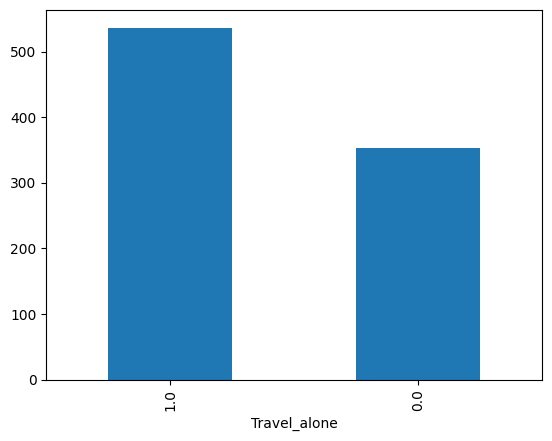

In [42]:
df["family"] = (
    df["SibSp"] + df["Parch"]
)  # this column will have the number of family members of the passengers
df.loc[df["family"] == 0, "Travel_alone"] = 1
df.loc[df["family"] > 0, "Travel_alone"] = 0

df['Travel_alone'].value_counts().plot(kind='bar')